# Init

This notebook's initialization cell can be copied to other notebooks

In [ ]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path + "/src")
print(f"Project path set to: {os.getcwd()}")


Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
new_path = config["NEW_DATA_PATH"]
print(f'New data path set to: {new_path}')

New data path set to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project


# Config 

In [4]:
from models.utils.config_manager import initialise_config

initialise_config(folder_name="test-folder", verbose=1)


Created folder structure at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\test-folder


In [5]:
from models.utils.config_manager import save_configs

"""
notebook:
  version: "testCaseA"
  name: "model-inspection"
  compatible_notebooks: ["model-inspection-1"]
  desc: | 
    Monitor the behaviour of basic networks to ensure systems correctness 

exp: 
  spec:
    n_layers: 2
    n_cascades: 1
    n_regs: 0
    gen_seed: 42
    drug:
      name: "D"
      start: 500
      dose: 500
      regulations: [['R1', 'down']]
  parameter_generation:
    ic_range: [200,1000]
    param_range: [0.5,1.5]
    param_mul_range: [0.99, 1.01] # almost no multiplication, legacy 
  simulation: 
    start: 0
    stop: 1000
    step: 100
"""

example_config = {
    "notebook": {
        "version": "v1",
        "name": "test-folder",
        "compatible_notebooks": ["example-analysis"],
        "desc": "Monitor the behaviour of basic networks to ensure systems correctness",
    },
    "exp": {
        "spec": {
            "n_layers": 2,
            "n_cascades": 1,
            "n_regs": 0,
            "gen_seed": 42,
            "drug": {
                "name": "D",
                "start": 500,
                "dose": 500,
                "regulations": [["R1", "down"]],
            },
        },
        "parameter_generation": {
            "ic_range": [200, 1000],
            "param_range": [0.5, 1.5],
            "param_mul_range": [0.99, 1.01],  # almost no multiplication, legacy
        },
        "simulation": {"start": 0, "stop": 1000, "step": 100},
    },
}

save_configs(folder_name=example_config['notebook']['name'], config=example_config)

In [ ]:
# or load existing config
from models.utils.config_manager import load_configs

loaded_config = load_configs(folder_name="test-folder", config_suffix="v1")
# print loaded config
print(loaded_config['notebook'])
print(loaded_config['exp'])

{'version': 'v1', 'name': 'test-folder', 'compatible_notebooks': ['example-analysis'], 'desc': 'Monitor the behaviour of basic networks to ensure systems correctness'}
{'spec': {'n_layers': 2, 'n_cascades': 1, 'n_regs': 0, 'gen_seed': 42, 'drug': {'name': 'D', 'start': 500, 'dose': 500, 'regulations': [['R1', 'down']]}}, 'parameter_generation': {'ic_range': [200, 1000], 'param_range': [0.5, 1.5], 'param_mul_range': [0.99, 1.01]}, 'simulation': {'start': 0, 'stop': 1000, 'step': 100}}


# Run

## Create mock data

In [10]:
import pandas as pd
from sklearn.datasets import make_regression
from models.utils.config_manager import save_data 

X, y = make_regression(n_samples=100, n_features=1, noise=0.4, random_state=42)
data = pd.DataFrame(X, columns=["Feature"])
data["Target"] = y

notebook_config = example_config['notebook']

save_data(notebook_config, data, 'make_regression_data', verbose=1)
# save data again in csv format
save_data(notebook_config, data, 'make_regression_data', 'csv', verbose=1)


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\test-folder\figures\regression_scatter_v1.png


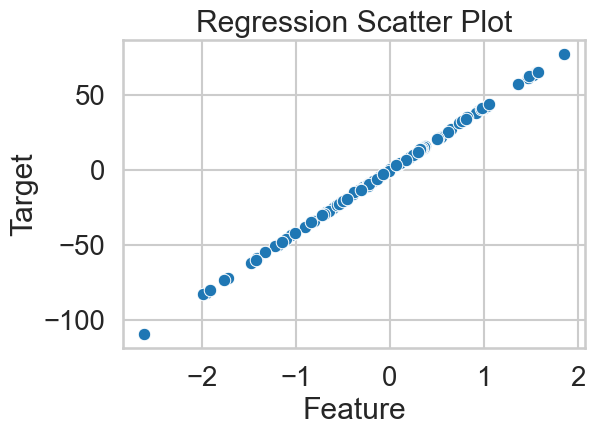

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from models.utils.config_manager import save_figure

# use seaborn to create a scatter plot
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.2)

sns.scatterplot(x='Feature', y='Target', data=data)
plt.title('Regression Scatter Plot')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.tight_layout()
save_figure(notebook_config, plt.gcf(), 'regression_scatter', verbose=1, dpi=300)
plt.show()